In [2]:
!pip install shap
!pip install openpyxl



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Asus\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Asus\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Asus\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Asus\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:

%pip install xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import shap
import warnings
warnings.filterwarnings("ignore")

sns.set(style='whitegrid')


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Asus\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
#  Load Dataset and Preprocess
df = pd.read_excel("LP_data_with_dates.xlsx", sheet_name="DATA")

# Drop timestamp (not useful for modeling)
df.drop(columns=["TIMESTAMP"], inplace=True)

# Handle missing values
df.fillna(df.mean(), inplace=True)

# Quick view
df.head()


,BFG_CO,BFG_CO2,BFG_H2,BFG_PR_DOWNSTREAM_1,BFG_PR_DOWNSTREAM_2,BFG_PR_DWNSTRM_CTRL_VLV_POSI_1,BFG_PR_DWNSTRM_CTRL_VLV_POSI_2,BFG_PR_UPSTREAM_1,BFG_PR_UPSTRM_CTRL_VLV_POSI_1,BFG_PR_UPSTRM_CTRL_VLV_POSI_2,...,Launder Chloride (ppm),Launder TSS (ppm),Overflow pH,Overflow Total Hardness (ppm),Overflow chloride (ppm),Overflow TSS (ppm),GCP pH,GCP Total Hardness (ppm),GCP Chloride (ppm),TOTAL_FLOW
0,25.698,25.309,4.076,0.082,0.081,11.089,0.480,0.101,91.765,99.105,...,1632,2756,7.14,790,1620,29,6.49,840.0,1622.0,829.834
1,25.023,24.823,4.246,0.081,0.080,30.535,0.485,0.098,93.773,99.131,...,1632,2756,7.14,790,1620,29,6.49,840.0,1622.0,824.656
2,25.455,25.230,4.112,0.077,0.077,10.098,0.484,0.098,78.053,92.389,...,1632,2756,7.14,790,1620,29,6.49,840.0,1622.0,825.956
3,25.722,25.342,3.867,0.081,0.080,11.707,0.473,0.101,77.035,97.010,...,1632,2756,7.14,790,1620,29,6.49,840.0,1622.0,829.753
4,25.485,25.145,4.130,0.081,0.080,21.175,0.484,0.101,83.199,99.614,...,1632,2756,7.14,790,1620,29,6.49,840.0,1622.0,825.290


In [5]:
df.columns

Index(['BFG_CO', 'BFG_CO2', 'BFG_H2', 'BFG_PR_DOWNSTREAM_1',
       'BFG_PR_DOWNSTREAM_2', 'BFG_PR_DWNSTRM_CTRL_VLV_POSI_1',
       'BFG_PR_DWNSTRM_CTRL_VLV_POSI_2', 'BFG_PR_UPSTREAM_1',
       'BFG_PR_UPSTRM_CTRL_VLV_POSI_1', 'BFG_PR_UPSTRM_CTRL_VLV_POSI_2',
       'BFG_PRESS_DWNSTRM_PCV_8104', 'CLEAN_GAS_PR_AFTER_DEMESTER',
       'CLEAN_GAS_TEMP_AFTER_DEMISTER', 'AG_ELEMENT_1_POSITION',
       'AG_ELEMENT_2_POSITION', 'AG_ELEMENT_3_POSITION',
       'BFG_HP_NETWORK_FLOWRATE', 'COLD_WATER_SUPPLY_PR',
       'COLD_WATER_SUPPLY_TEMP', 'HYDRAULIC_OIL_TEMP',
       'PR_BF_GAS_SCRUBBER_HEAD', 'PRE_SCRUBBER_LT_1', 'PRE_SCRUBBER_LT_2',
       'PRE_SCRUBBER_LT_3', 'PRESCRUBBER_WTR_CTRL_VLV_POSI',
       'PRESSURE_PUMP_OUTLET_PR', 'RECIR_WTR_CTRL_VLV_POSI',
       'RECIR_WATER_FLOW', 'RECIR_WATER_PRESS', 'SCRUBBER_AG_LT_1',
       'SCRUBBER_AG_LT_2', 'SCRUBBER_AG_LT_3', 'TEMP_BF_GAS_SCRUBBER_HEAD',
       'Launder (pH)', 'Launder Total Hardness (ppm)',
       'Launder Chloride (ppm)', 'Launde

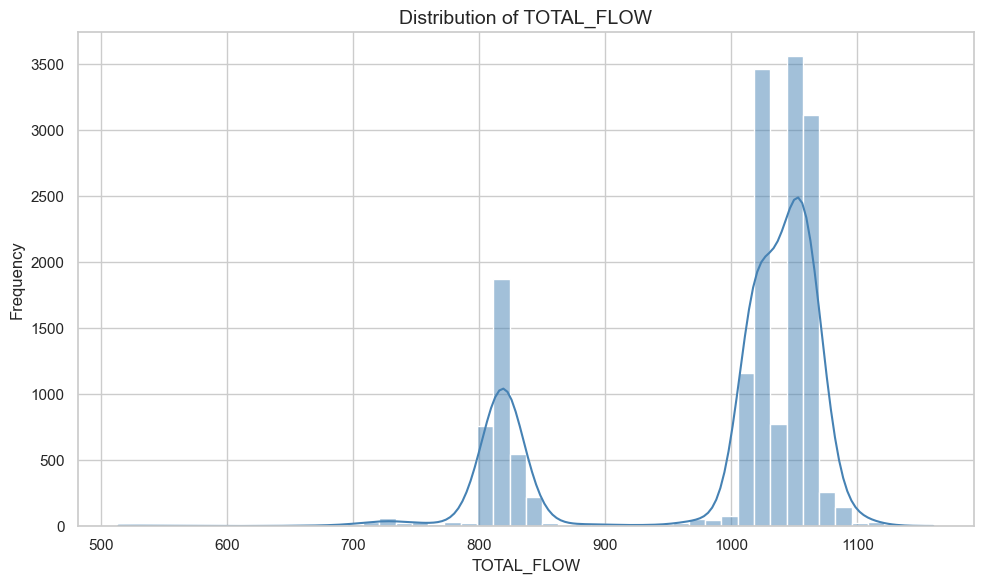

In [6]:
#Plot TOTAL_FLOW distribution
plt.figure(figsize=(10, 6))
sns.histplot(df["TOTAL_FLOW"], kde=True, bins=50, color="steelblue")
plt.title("Distribution of TOTAL_FLOW", fontsize=14)
plt.xlabel("TOTAL_FLOW")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [7]:
#Train-Test Split (80-20)
# Make sure df is loaded before running this cell
# df is loaded in cell 4

X = df.drop(columns=["TOTAL_FLOW"])
y = df["TOTAL_FLOW"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [8]:
# Train Models and Evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    results[name] = {
        "RMSE": np.sqrt(mean_squared_error(y_test, preds)),
        "MAE": mean_absolute_error(y_test, preds),
        "R2": r2_score(y_test, preds),
        "model": model,
        "preds": preds
    }

pd.DataFrame({
    name: {
        "RMSE": r["RMSE"],
        "MAE": r["MAE"],
        "R²": r["R2"]
    }
    for name, r in results.items()
}).T


,RMSE,MAE,R²
Linear Regression,26.409388,15.009754,0.927922
Random Forest,6.978773,2.188690,0.994967
XGBoost,6.827051,2.388049,0.995183


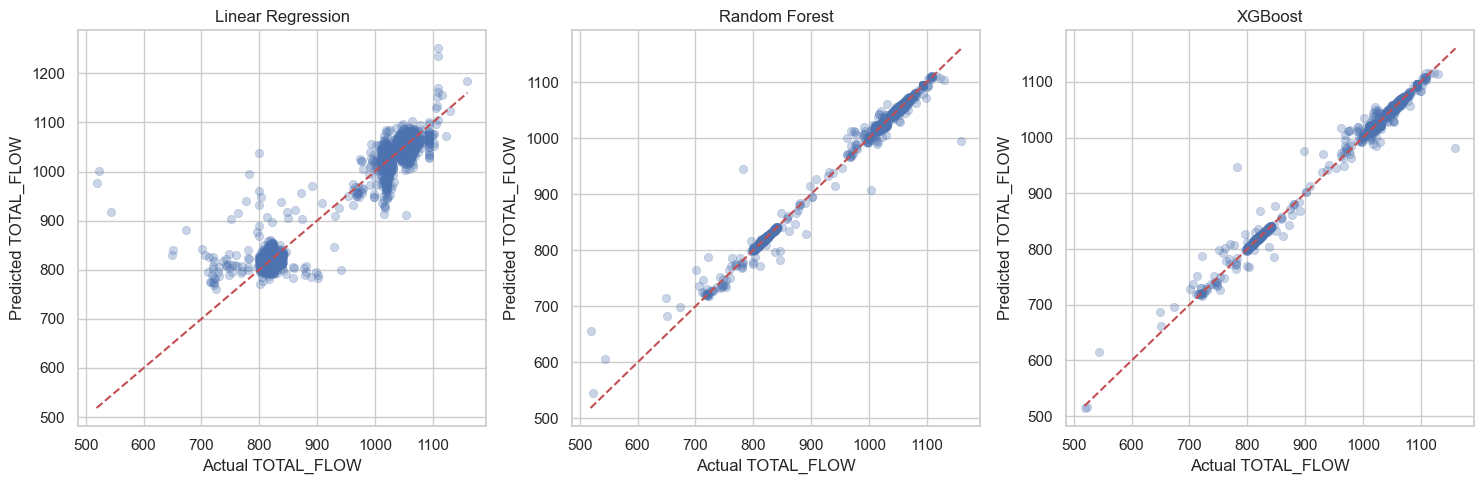

In [9]:
#Prediction Plots (Actual vs Predicted)
plt.figure(figsize=(15, 5))

for i, (name, r) in enumerate(results.items(), 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=y_test, y=r["preds"], alpha=0.3, edgecolor=None)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual TOTAL_FLOW")
    plt.ylabel("Predicted TOTAL_FLOW")
    plt.title(name)

plt.tight_layout()
plt.show()


🔍 SHAP Interpretation for: Linear Regression


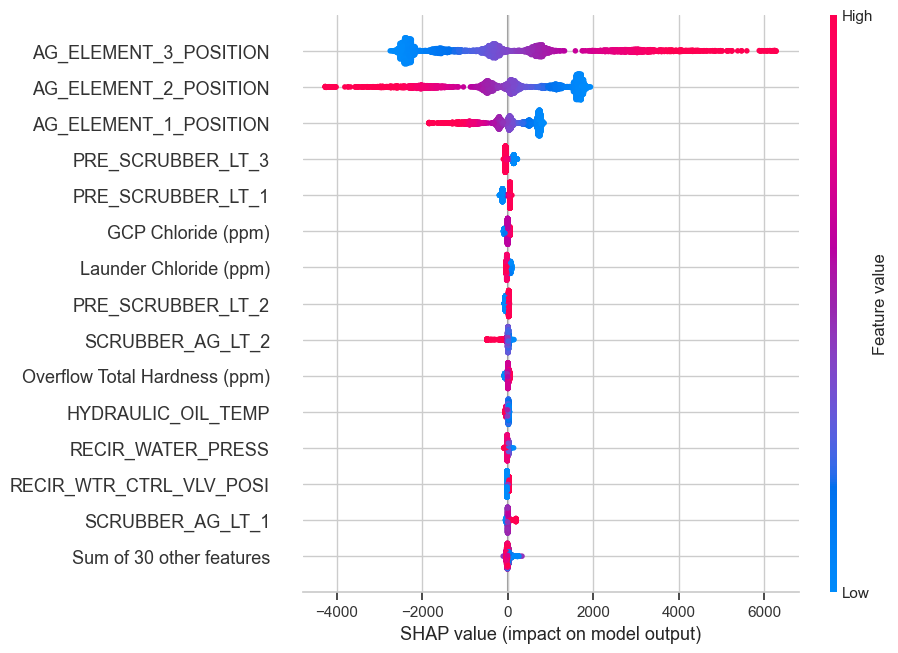

🔍 SHAP Interpretation for: Random Forest


100%|===================| 3287/3296 [03:36<00:00]        

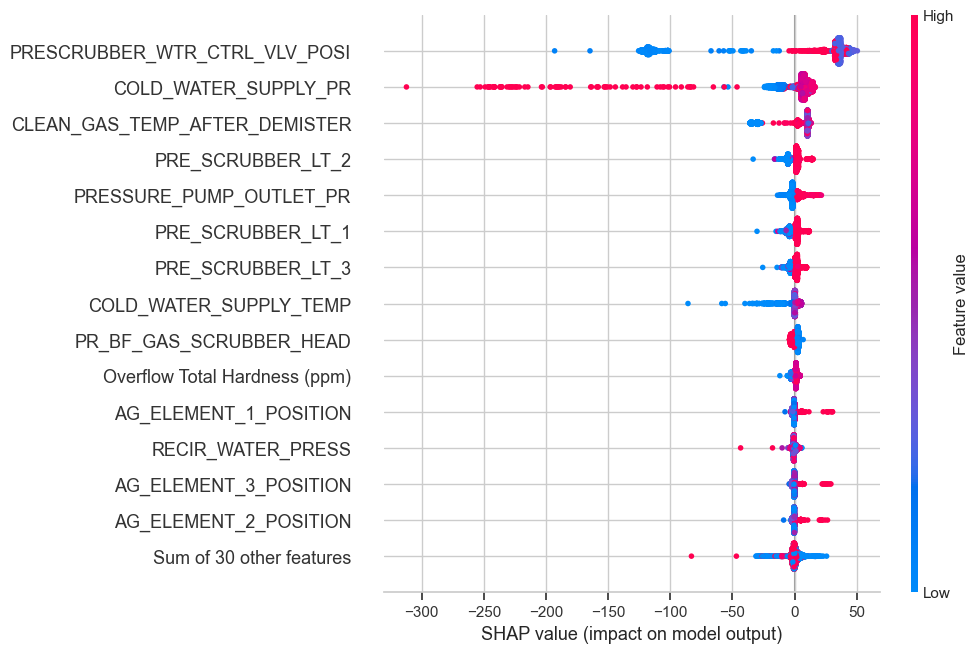

🔍 SHAP Interpretation for: XGBoost


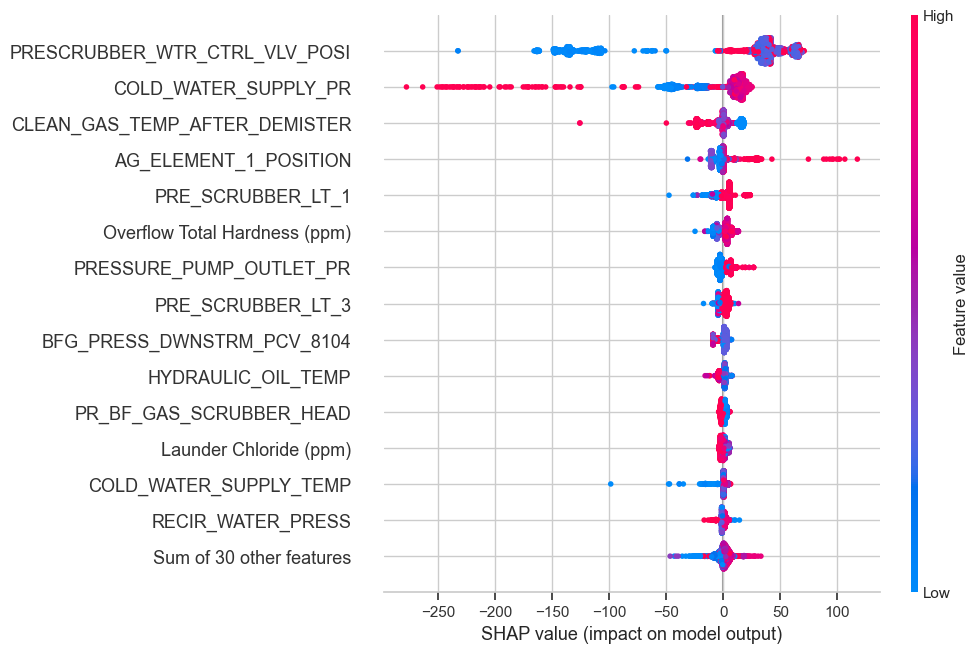

In [10]:
# SHAP summary plots for all three models
for name in ["Linear Regression", "Random Forest", "XGBoost"]:
    print(f"🔍 SHAP Interpretation for: {name}")

    model = results[name]["model"]

    # Use TreeExplainer for tree models, LinearExplainer for linear model
    if name == "Linear Regression":
        explainer = shap.Explainer(model, X_train)
    else:
        explainer = shap.Explainer(model, X_test)

    shap_values = explainer(X_test)

    # Show summary beeswarm plot
    shap.plots.beeswarm(shap_values, max_display=15)


In [ ]:
import joblib

# Save model from the results dictionary
joblib.dump(results["Random Forest"]["model"], "rf_model.pkl")
joblib.dump(X_train.columns.tolist(), "rf_features.pkl")
print("✅ Models saved successfully!")


✅ Models saved successfully!
